# Map Explorer

Data: **GaN_Dislocations_1.hdf5**

Basic Interactive EBSD Map Data Viewer Example.
In a Jupyter Notebook, we can nicely mix "programming" (typing commands) and "interactivity" (doing things with the mouse etc in a user interface).

Note: The interactive features only work when running Jupyter notebook, not in the HTML documentation.

In [17]:
ebsdpatternfile = "../../../../xcdskd_reference_data/GaN_Dislocations_1/hdf5/GaN_Dislocations_1.hdf5"

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from skimage.io import imread, imsave

from aloe.plots import plot_image
from aloe.io.patternproviders import EBSDDataManager
from aloe.io.patternproviders import H5PatternDataProviderCPRCTF as H5PatternDataProvider
from aloe.io.mapexplorer import MapExplorer

## Connect the Data Sources

In [20]:
hdf5_file = Path(ebsdpatternfile)
if hdf5_file.is_file():
    # file exists
    h5srv = H5PatternDataProvider(ebsdpatternfile, scan = 'Scan/', pattern_name = 'RawPatterns')
else:
    print('ERROR: file not found: ', ebsdpatternfile)

2600


## The Base Map

We will select the spatial position on this map. Ideally, the signal should be from exactly the same position as the EBSP, e.g. a BSE map (or arBSE color maps) derived from the raw EBSD images themselves. 

<HDF5 dataset "bse_map": shape (50, 52), type "<f8">


<IPython.core.display.Javascript object>


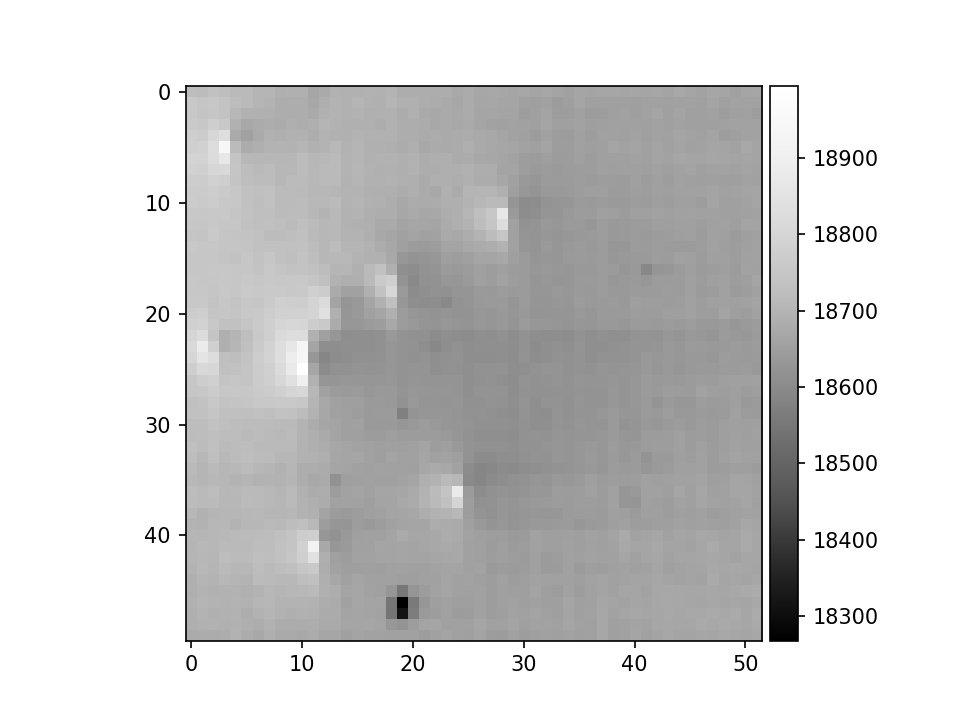

In [21]:
print(h5srv.bse_total)
plot_image(h5srv.bse_total)

## EBSD Data

The `EBSDDataManager` provides the common functionality for getting patterns and pattern calibration and orientation data etc from various different underlying data sources (e.g. HDF5 in different formats).  

In [22]:
ebsd = EBSDDataManager(h5srv)

In [23]:
pattern_data = ebsd.get_pattern_data(30, 20)
print(pattern_data)

{'pattern': array([[ 7816.,  8016.,  8080., ...,  8464.,  8208.,  7992.],
       [ 7888.,  7896.,  8200., ...,  8008.,  8088.,  8184.],
       [ 7784.,  7880.,  7864., ...,  8272.,  8312.,  8088.],
       ..., 
       [ 8808.,  8744.,  8928., ...,  9560.,  9576.,  8944.],
       [ 8832.,  8624.,  8720., ...,  9472.,  9488.,  9184.],
       [ 8592.,  8608.,  8800., ...,  9600.,  9160.,  9096.]], dtype=float32), 'euler_rad': array([ 0.,  0.,  0.], dtype=float32), 'xtilt_rad': 0.0, 'pc_brkr': array([ 0.5,  0.5,  1. ], dtype=float32)}


<IPython.core.display.Javascript object>


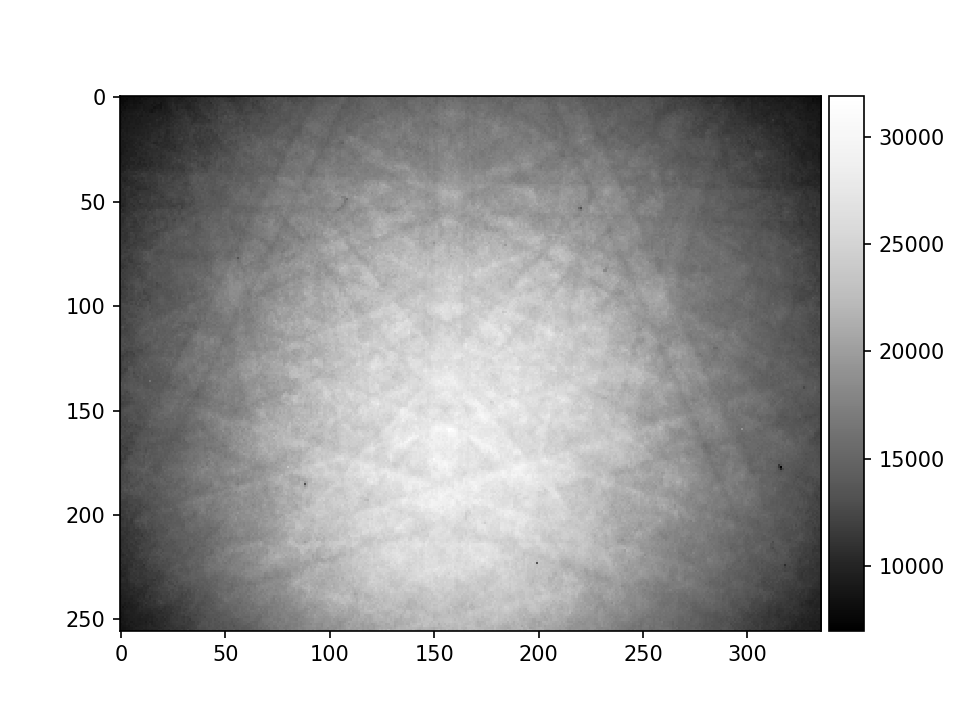

In [24]:
# plot the pattern from the returned data set "pattern_data" (dictionary)
plot_image(pattern_data['pattern'])

## Interactive Map Explorer

now we should be ready to start the Map Explorer...

Left click in map to set new reference position.
Select a Map Position with the Mouse and the pattern will update. 

The last Slider adjusts the number of neighbors to be averaged. 
Averaging will not be done while real-time updating the mouse pointer (i.e. click the position to be averaged, this will move the blue circle, which indicates the reference position for averaging).

<IPython.core.display.Javascript object>


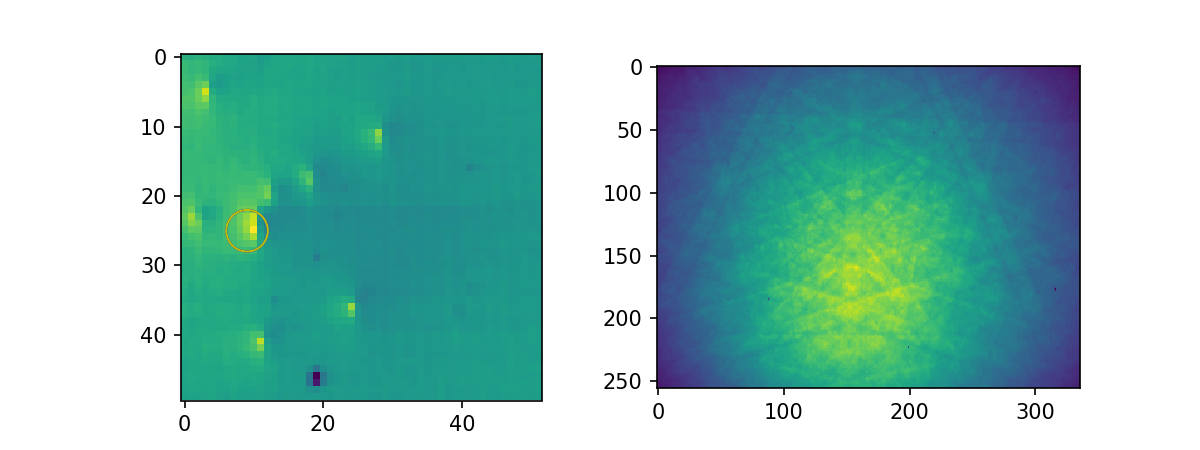

In [25]:
ebsd.pattern_preprocessing = False # set to True for removing the background (very very slow)

explorer = MapExplorer(ebsd, h5srv.bse_total)
explorer.init_plot()
explorer.init_widgets()
explorer.show_widgets()

## Using the Values which where selected in the  Map Explorer

The interactive map explorer allows us to select a good map position or other parameters and then we can continue with these selected parameters in "programming" style work when necessary:

In [26]:
# We can also continue to work with the values that the user has set interactively above:
iy = explorer.iy_slider.value
ix = explorer.ix_slider.value
ebsd.nap = explorer.neighbor_slider.value
print(iy, ix, ebsd.nap)

25 9 1


 +/- Neighbors used for average:  1


<IPython.core.display.Javascript object>


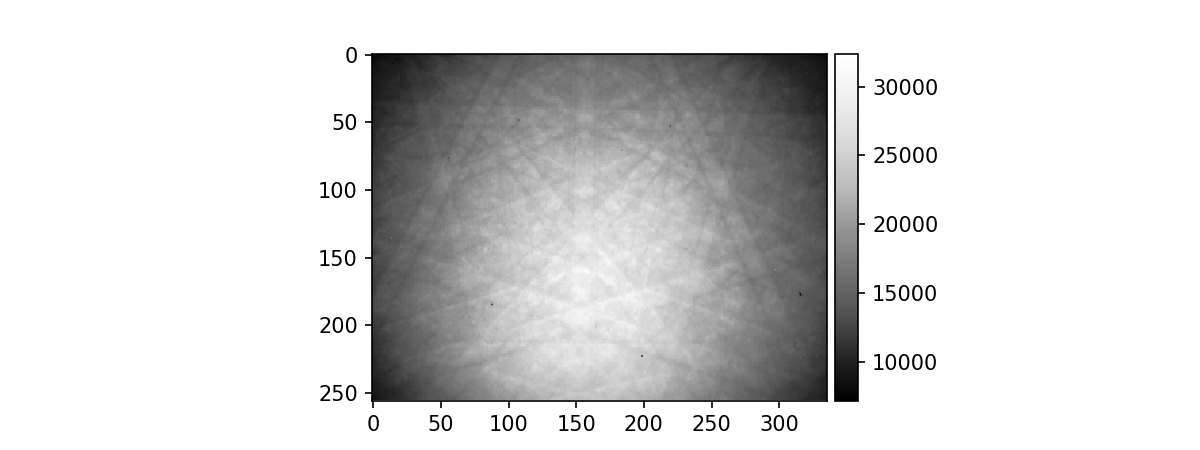

In [27]:
current_pattern = ebsd.get_nap(ix, iy, invert=False)
print(' +/- Neighbors used for average: ', ebsd.nap)
plot_image(current_pattern)

 +/- Neighbors used for average:  4


<IPython.core.display.Javascript object>


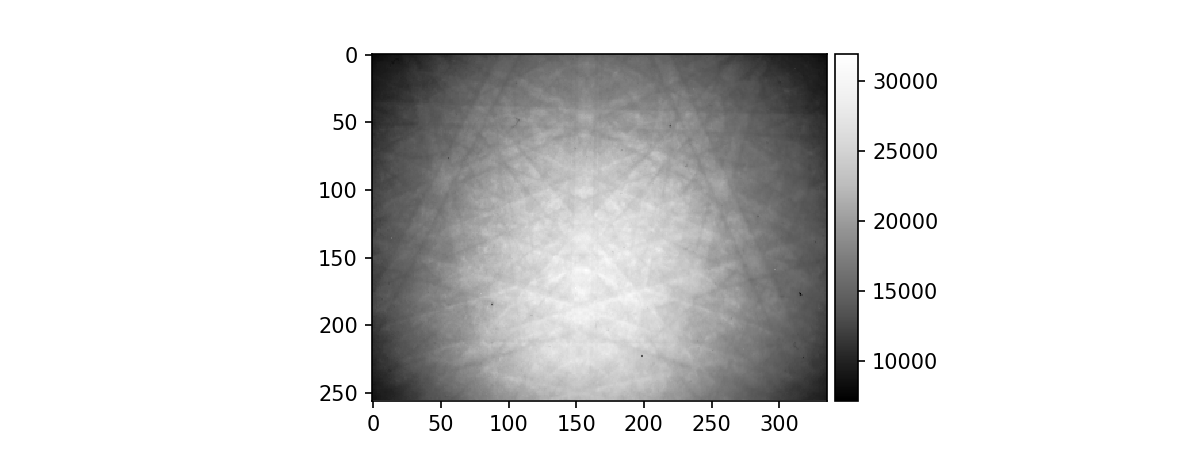

In [28]:
ebsd.nap = 4 # set new value 
current_pattern = ebsd.get_nap(ix, iy, invert=False)
print(' +/- Neighbors used for average: ', ebsd.nap)
plot_image(current_pattern)

 +/- Neighbors used for average:  2


<IPython.core.display.Javascript object>


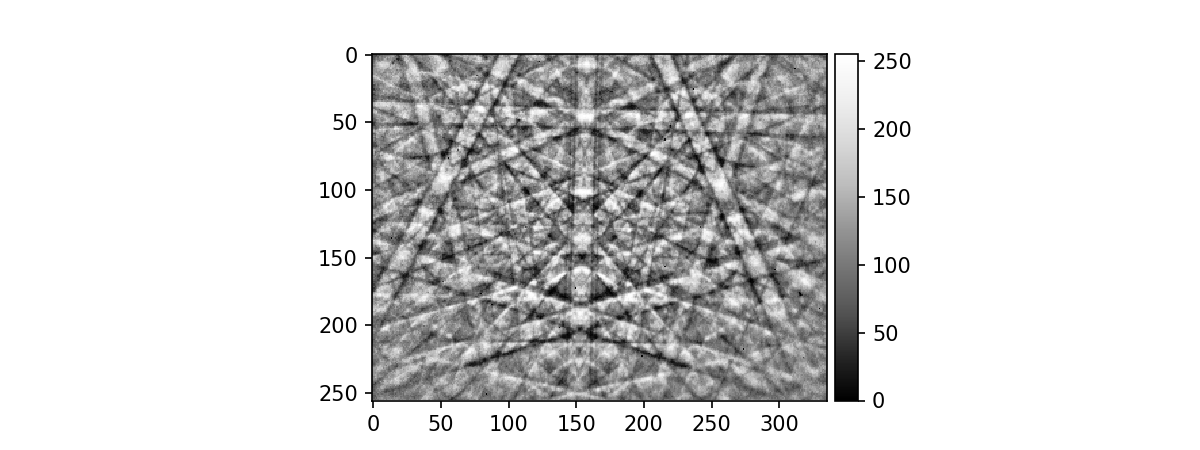

In [29]:
# switch on background treament
ebsd.pattern_preprocessing = True
ebsd.nap = 2

current_pattern = ebsd.get_nap(ix, iy, invert=False)
print(' +/- Neighbors used for average: ', ebsd.nap)
plot_image(current_pattern)

 +/- Neighbors used for average:  2


<IPython.core.display.Javascript object>


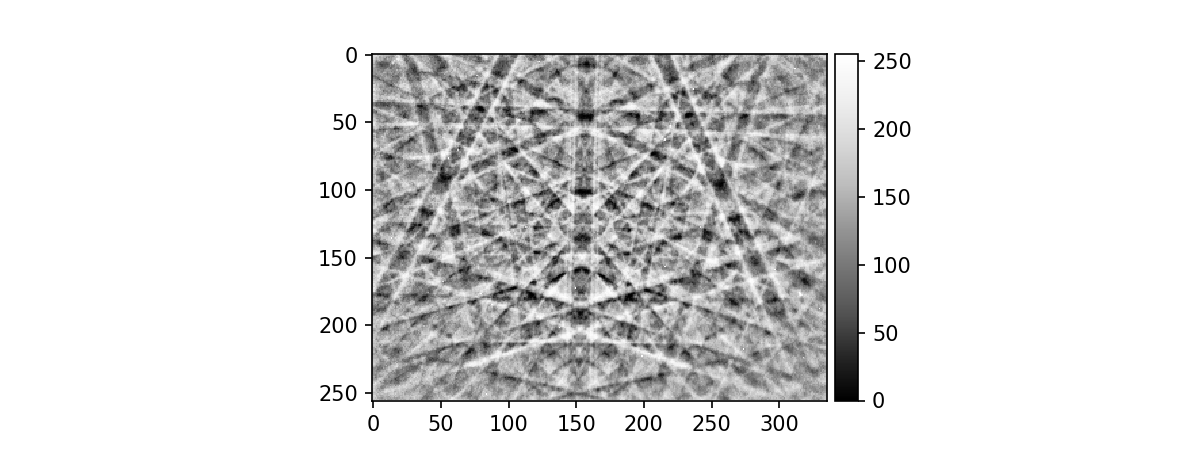

In [30]:
# invert pattern (e.g. use for fitting inverted experimental patterns)
current_pattern = ebsd.get_nap(ix, iy, invert=True)
print(' +/- Neighbors used for average: ', ebsd.nap)
plot_image(current_pattern)